<a href="https://colab.research.google.com/github/dharshini02/ML/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Titanic ship prediction

In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##Data Cleaning and Preprocessing

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked']

In [8]:
data.drop(df,axis=1,inplace=True)

In [11]:
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


##EDA

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


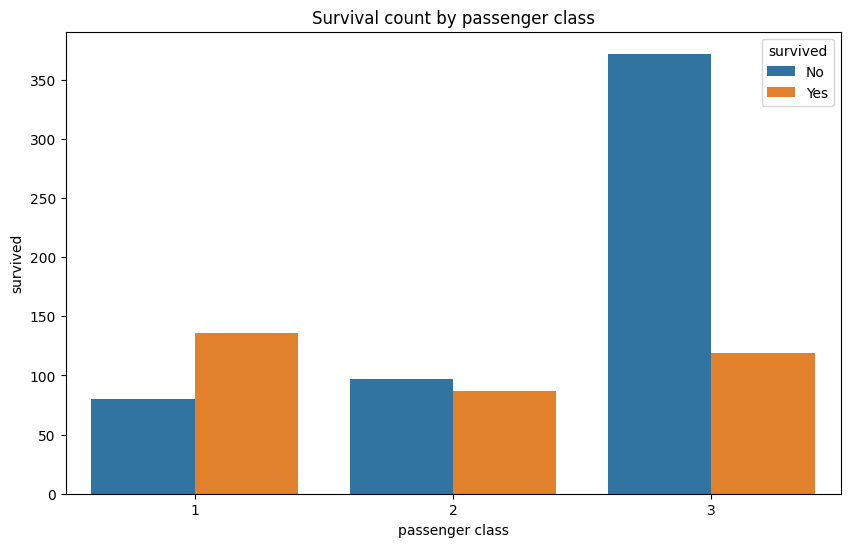

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data,x='Pclass',hue='Survived')
plt.title('Survival count by passenger class')
plt.xlabel('passenger class')
plt.ylabel('survived')
plt.legend(title='survived',labels=['No','Yes'])
plt.show()

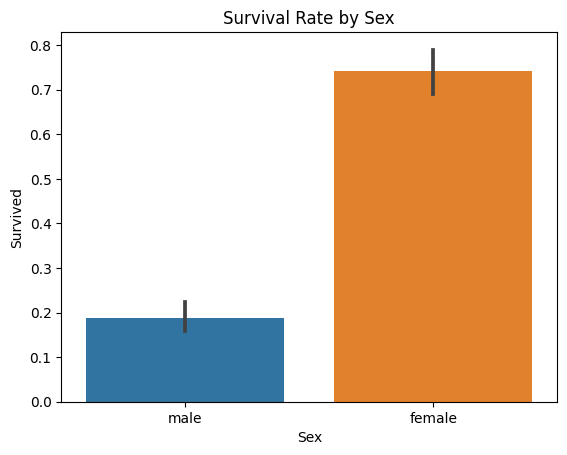

In [20]:
sns.barplot(data,x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()

<Figure size 1200x600 with 0 Axes>

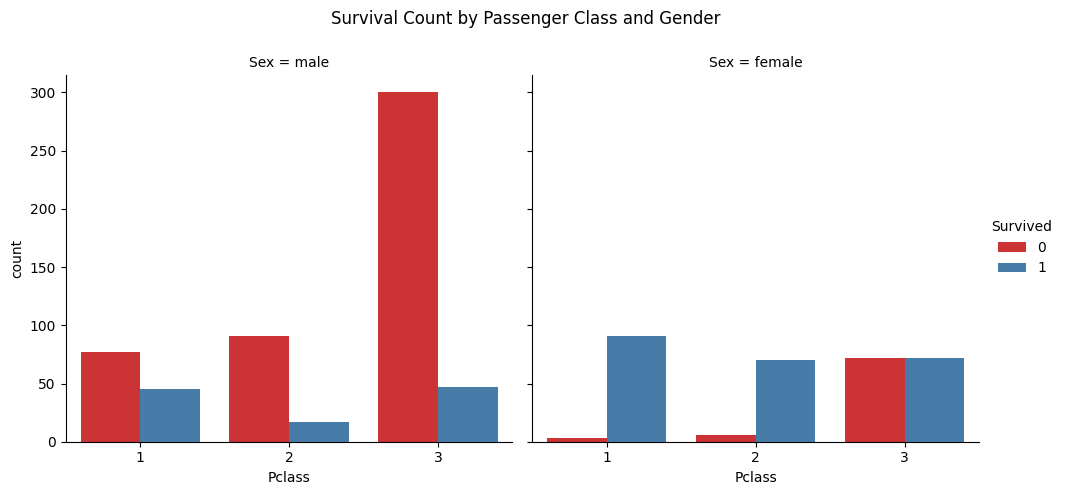

In [30]:
plt.figure(figsize=(12, 6))
sns.catplot(data, x='Pclass', hue='Survived', col='Sex', kind='count', palette='Set1')
plt.subplots_adjust(top=0.85)
plt.suptitle("Survival Count by Passenger Class and Gender")
plt.show()

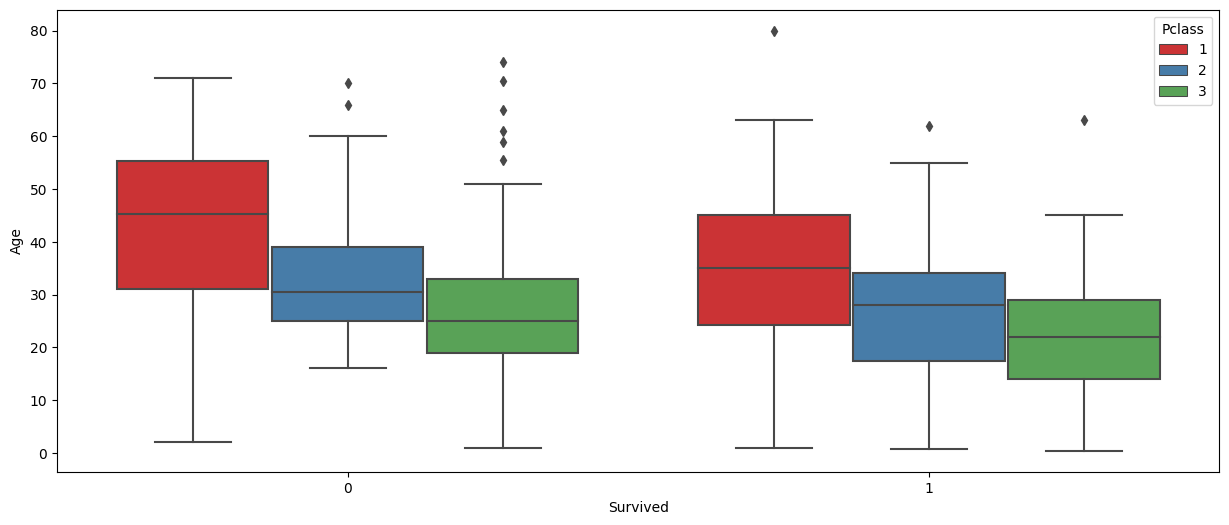

In [40]:
plt.figure(figsize=(15,6))
sns.boxplot(data,x='Survived',y='Age',hue='Pclass',palette='Set1')
plt.show()

In [41]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
mean_age=data['Age'].mean()
data['Age'].fillna(mean_age,inplace=True)


In [42]:
data

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [43]:
input=data.drop(['Survived'],axis=1)
input

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [44]:
target=data['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [45]:
input.Sex = input.Sex.map({'male': 1, 'female': 2})

In [46]:
input.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


##Model Training

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.2)

In [55]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [62]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
prediction=model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,prediction)
print('Accuracy of test data',Accuracy)

Accuracy of test data 0.7821229050279329


In [72]:
prediction1=model.predict(X_train)

In [74]:
Accuracy_train=accuracy_score(y_train,prediction1)
print('Accuracy of train data',Accuracy_train)

Accuracy of train data 0.9775280898876404


##Precdiction system



In [75]:
input=(3,1,22.0,7.2500)
input_data=np.array(input)
res_data=input_data.reshape(1,-1)
prediction_sys=model.predict(res_data)
print(prediction_sys)


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
